In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torchvision
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.tensorboard import SummaryWriter
import torch.optim as optim

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = '/Users/sunghohong/Desktop/data/FashionMNIST',
    train=True, # data for the training set
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor() # transform the data into tensors
    ])
)

torch.Size([1, 28, 28])


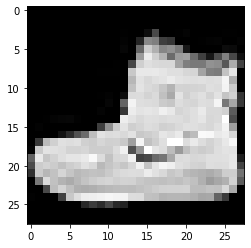

In [3]:
image, label = train_set[0]
print(image.shape)
plt.imshow(image.squeeze(), cmap='gray')

In [4]:
train_set.classes

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [5]:
in_features = image.numel()
in_features

784

In [6]:
import math 
out_features = math.floor(in_features / 2)
out_features 

392

In [7]:
out_classes = len(train_set.classes)
out_classes 

10

In [8]:
network = nn.Sequential(
      # skip the batch, # start from color channel 
      nn.Flatten(start_dim=1)
    , nn.Linear(in_features, out_features)
    , nn.Linear(out_features, out_classes)    
)
network

Sequential(
  (0): Flatten(start_dim=1, end_dim=-1)
  (1): Linear(in_features=784, out_features=392, bias=True)
  (2): Linear(in_features=392, out_features=10, bias=True)
)

In [23]:
network = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=6, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    nn.BatchNorm2d(6),
    
    nn.Conv2d(in_channels=6, out_channels=12, kernel_size=5),
    nn.ReLU(),
    nn.MaxPool2d(kernel_size=2, stride=2),
    
    nn.Flatten(start_dim=1),
    nn.Linear(in_features=12*4*4, out_features=120),
    nn.ReLU(),
    
    nn.Linear(in_features=120, out_features=60),
    nn.ReLU(),
    
    nn.Linear(in_features=60, out_features=10),
)
network 

Sequential(
  (0): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (4): Conv2d(6, 12, kernel_size=(5, 5), stride=(1, 1))
  (5): ReLU()
  (6): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (7): Flatten(start_dim=1, end_dim=-1)
  (8): Linear(in_features=192, out_features=120, bias=True)
  (9): ReLU()
  (10): Linear(in_features=120, out_features=60, bias=True)
  (11): ReLU()
  (12): Linear(in_features=60, out_features=10, bias=True)
)

In [24]:
# Dataset Normalization 
train_loader = torch.utils.data.DataLoader(train_set, batch_size = len(train_set), num_workers=1)
# [sample, labels]
data = next(iter(train_loader))
mean, std = data[0].mean(), data[0].std()
mean, std

(tensor(0.2860), tensor(0.3530))

In [25]:
train_set_normal = torchvision.datasets.FashionMNIST(
    root = '/Users/sunghohong/Desktop/data/FashionMNIST',
    train=True, # data for the training set
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor(), # transform the data into tensors
        transforms.Normalize(mean, std)
    ])
)

In [26]:
train_loader = torch.utils.data.DataLoader(train_set_normal, batch_size = len(train_set), num_workers=1)
data = next(iter(train_loader))
mean, std = data[0].mean(), data[0].std()
print(mean, std)

tensor(-4.0026e-08) tensor(1.)


In [27]:
def get_num_correct(preds, labels):
    return preds.argmax(dim=1).eq(labels).sum().item()
optimizer = optim.Adam(network.parameters(), lr=0.01)
for epoch in range(5):
    total_loss = 0
    total_accuracy = 0 

    for batch in train_loader:
        images, labels = batch

        preds = network(images)
        loss = F.cross_entropy(preds, labels)
        
        optimizer.zero_grad()
        loss.backward() # calculate the gradients 
        optimizer.step() # update the weights

        total_loss += loss.item()
        total_accuracy += get_num_correct(preds, labels)

    print('epoch:', epoch, "loss", total_loss, "accuracy", total_accuracy / len(train_set))

epoch: 0 loss 2.313199043273926 accuracy 0.03595
epoch: 1 loss 2.2137324810028076 accuracy 0.19771666666666668
epoch: 2 loss 1.9398459196090698 accuracy 0.4007
epoch: 3 loss 1.6586557626724243 accuracy 0.4506
epoch: 4 loss 1.2424964904785156 accuracy 0.5166333333333334
